In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

import datetime

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
#Load and prepare arctic oscillation index dataset
file_ao = '/home/wpratt3/Clim680/Assignment3/ao_index.txt'
df_ao = pd.read_csv(file_ao)
df_ao['time'] = pd.to_datetime(df_ao[['Year', 'Month']].assign(day=1))
df_ao_index = df_ao.set_index('time')
da_ao = df_ao_index.to_xarray().set_coords('Month').drop_vars('Year')
da_ao


<xarray.Dataset> Size: 22kB
Dimensions:  (time: 898)
Coordinates:
    Month    (time) int64 7kB 1 2 3 4 5 6 7 8 9 10 11 ... 1 2 3 4 5 6 7 8 9 10
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2024-10-01
Data variables:
    Value    (time) float64 7kB -0.0603 0.6268 -0.0081 ... 1.284 -0.6237 0.5248

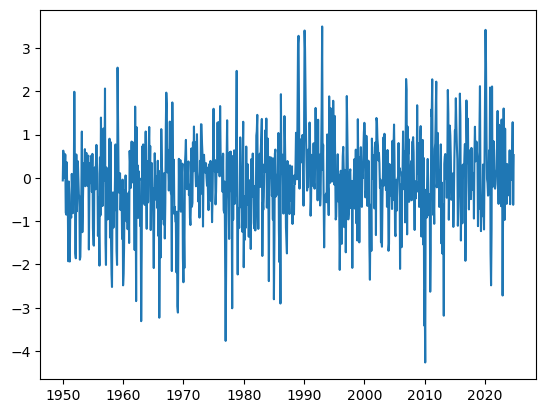

In [3]:
#Plot index values over time
plt.plot(da_ao['time'],da_ao['Value'])

In [11]:
#Categorize the arctic oscillation by month
positive = da_ao['Value'].where(da_ao['Value'] >= 1)
negative = da_ao['Value'].where(da_ao['Value'] <= -1)
neutral = da_ao['Value'].where((da_ao['Value'] >= -1) & (da_ao['Value'] <= 1))

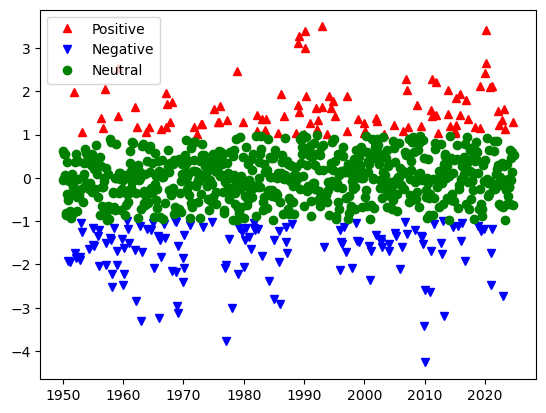

In [12]:
#Plot categorized arctic oscillation over time
plt.plot(da_ao['time'],positive, marker = '^', color = 'red', linestyle = 'none', label = 'Positive')
plt.plot(da_ao['time'],negative,'bv', label = 'Negative')
plt.plot(da_ao['time'],neutral,'go', label = 'Neutral')

plt.legend()

In [13]:
#Calculate and prepare counts of observations in each category
print('Positive: ',positive.count(dim='time').values)
print('Negative: ',negative.count(dim='time').values)
print('Neutral: ',neutral.count(dim='time').values)

counts=[positive.count(dim='time').values,
        negative.count(dim='time').values,
        neutral.count(dim='time').values]

print(counts)

Positive:  103
Negative:  140
Neutral:  655
[array(103), array(140), array(655)]


In [7]:
#Open soils data and match to arctic oscillation data
ds_soil = xr.open_dataset('/home/wpratt3/Clim680/Data/soilw.mon.mean.v2.nc.1')
ds_soil_slice = ds_soil.soilw.sel(time=slice(da_ao['time'][0],da_ao['time'][-1]))
ds_soil_slice


<xarray.DataArray 'soilw' (time: 898, lat: 360, lon: 720)> Size: 931MB
[232761600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2024-10-01
Attributes:
    long_name:      Model-Calculated Monthly Mean Soil Moisture
    units:          mm
    valid_range:    [   0. 1000.]
    dataset:        CPC Monthly Soil Moisture
    var_desc:       Soil Moisture
    level_desc:     Surface
    statistic:      Monthly Mean
    parent_stat:    Other
    standard_name:  lwe_thickness_of_soil_moisture_content
    cell_methods:   time: mean (monthly from values)
    actual_range:   [  0.     756.0375]

In [8]:
#Calculate climatology and anomalies of soils data
ds_climo = ds_soil_slice.groupby('time.month').mean()
ds_anoms = ds_soil_slice.groupby('time.month')-ds_climo
ds_anoms

<xarray.DataArray 'soilw' (time: 898, lat: 360, lon: 720)> Size: 931MB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [ -7.251656 ,  -7.2348466,  -7.2187104, ...,  -7.307555 ,
          -7.28831  ,  -7.269783 ],
        [ -7.222681 ,  -7.2128897,  -7.204644 , ...,  -7.2594357,
          -7.2449813,  -7.2331343],
        [-11.429923 , -11.42638  , -11.422989 , ..., -11.41995  ,
         -11.43695  , -11.433475 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [150.80783  , 150.34077  , 149.86952  , ..., 152.1815   ,
         151.72798  , 151.26988  ],
        [133.25157  , 132.97147  , 132.68797  , ..., 134.1259   ,
         133.80351  , 133.52914  ],
        [117.92199  , 117.8138   , 117.70479  , ..., 117.93852  ,
         118.13585  , 118.029335 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [151.67896  , 151.2085   , 150.73393  , ..., 153.06306  ,
         152.60605  , 152.14447  ],
        [134.09363  , 133.81187  , 133.52676  , ..., 135.02806  ,
         134.70638  , 134.37292  ],
        [119.09028  , 118.98129  , 118.87148  , ..., 119.112656 ,
         119.30579  , 119.19844  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 7kB 1950-01-01 1950-02-01 ... 2024-10-01
    month    (time) int64 7kB 1 2 3 4 5 6 7 8 9 10 11 ... 1 2 3 4 5 6 7 8 9 10

In [15]:
positive_soil = ds_anoms.sel(time=positive.dropna(dim='time')['time']).mean(dim='time')
negative_soil = ds_anoms.sel(time=negative.dropna(dim='time')['time']).mean(dim='time')
neutral_soil = ds_anoms.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')

comp_soil = [positive_soil, negative_soil, neutral_soil]

Text(0.5, 0.98, 'Composite Soil Moisture Anomalies during Arctic Oscillation')

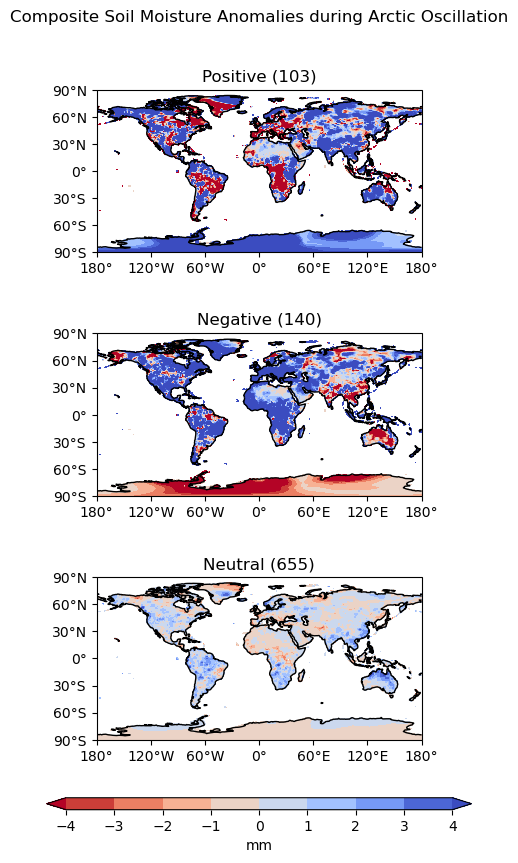

In [20]:
labels=['Positive','Negative', 'Neutral']
clevs = np.arange(-4.0,4.1,1)

# Define the figure and each axis for the 3 rows and 1 column
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,10))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,ao in enumerate(comp_soil):

        # Select the season
        data = comp_soil[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=comp_soil[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_soil[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm_r',
                          extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        # Title each subplot with the name of the arctic oscillation period
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='mm')

# Add a big title at the top
plt.suptitle('Composite Soil Moisture Anomalies during Arctic Oscillation') 

In [21]:
diff_soil =[positive_soil-neutral_soil, 
             negative_soil-neutral_soil]

Text(0.5, 0.98, 'Composite Soil Differences during Arctic Oscillation')

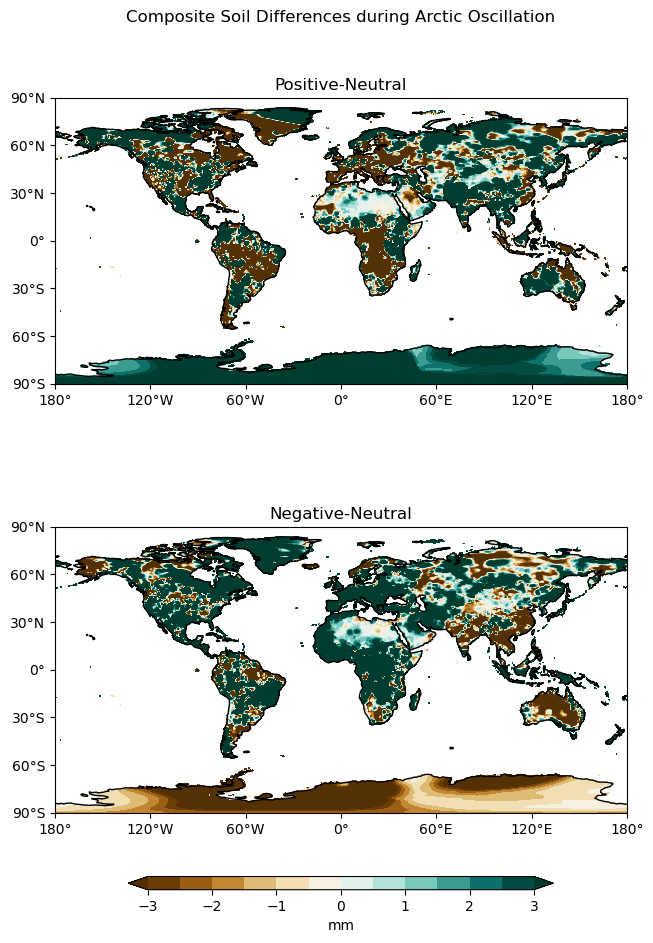

In [23]:
labels=['Positive-Neutral','Negative-Neutral']
clevs=np.arange(-3,3.5,0.5)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,10))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,ao in enumerate(diff_soil):

        # Select the season
        data = diff_soil[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=diff_soil[i]['lon'])

        # Contour plot
        cs = axs[i].contourf(lons,diff_soil[i]['lat'],data,clevs,
                          transform=ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm')

# Add a big title at the top
plt.suptitle('Composite Soil Moisture Anomaly Differences during Arctic Oscillation')

In [ ]:
p = 0.05

positive_soil_vals = ds_anoms.sel(time=Positive.dropna(dim='time')['time'])
negative_soil_vals = ds_anoms.sel(time=Negative.dropna(dim='time')['time'])
neutral_soil_vals = ds_anoms.sel(time=Neutral.dropna(dim='time')['time'])

tstat,pval = ttest_ind(positive_soil_vals, 
                neutral_soil_vals, 
                equal_var = False)

mask_diff = diff_soil[0].where(pval <= p)

In [ ]:
labels=['Positive vs. Neutral']
clevs=np.arange(-3,3.5,0.5)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200.0)})


data=diff_soil[0]

# Add the cyclic point
data,lons=add_cyclic_point(data,coord=diff_precip[0]['lon'])
mask_data,lons=add_cyclic_point(mask_diff,coord=diff_precip[0]['lon'])

# Contour plot
cs=axs.contourf(lons,diff_precip[0]['lat'],data,clevs,
                transform = ccrs.PlateCarree(),
                cmap='BrBG',extend='both')

# Overlay of stippling
ss=axs.contourf(lons,diff_precip[0]['lat'],mask_data,[0,1],
                transform = ccrs.PlateCarree(),colors=['None'],
                hatches=['///',''],extend='both',alpha=0.0)

# Draw the coastines for each subplot
axs.coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.18, 0.7, 0.025])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='mm')

# Add a big title at the top
plt.suptitle('Composite Soil Differences Positive-Neutral')